In [ ]:
horizons = [2,5,60]
new_predictors = predictors.copy()

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["Close"]
    
    new_predictors+= [trend_column]   

# Calculate 7-day moving averages
data['7_day_avg'] = data['Close'].rolling(window=7).mean()

# Calculate daily variations
data['daily_variation'] = data['Close'].diff()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

new_predictors+=['7_day_avg','daily_variation','SMA_50']

<ipython-input-31-da2101e94b31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[trend_column] = data.shift(1).rolling(horizon).sum()["Close"]
<ipython-input-31-da2101e94b31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[trend_column] = data.shift(1).rolling(horizon).sum()["Close"]
<ipython-input-31-da2101e94b31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
data=data.dropna()

In [ ]:
data

,Open,High,Low,Close,Volume,SMA_50,RSI,Trend_2,Trend_5,Trend_60,7_day_avg,daily_variation
Date,,,,,,,,,,,,
2010-06-10,1058.770020,1087.849976,1058.770020,1086.839966,5144780000,1148.122197,53.210117,2117.689941,5335.869873,69157.179810,1074.441406,31.150024
2010-06-11,1082.650024,1092.250000,1077.119995,1091.599976,4059280000,1146.565596,50.864324,2142.529907,5319.879883,69084.559814,1073.472831,4.760010
2010-06-14,1095.000000,1105.910034,1089.030029,1089.630005,4425830000,1144.796196,53.731542,2178.439941,5346.599854,69009.949829,1071.587123,-1.969971
2010-06-15,1091.209961,1115.589966,1091.209961,1115.229980,4644490000,1143.351997,58.606980,2181.229980,5385.759888,68933.749878,1078.779977,25.599976
2010-06-16,1114.020020,1118.739990,1107.130005,1114.609985,5002600000,1141.855398,59.975198,2204.859985,5438.989868,68889.079834,1087.942836,-0.619995
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4468.565000,25.527165,8657.500000,21833.650391,268177.249512,4365.815709,-63.910156
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4462.955596,26.686156,8610.969727,21663.229980,268000.399414,4340.241420,0.979980
2023-09-28,4269.649902,4317.270020,4264.379883,4299.700195,3846230000,4457.635195,30.159703,8548.039551,21535.539551,267819.319336,4319.634277,25.190430


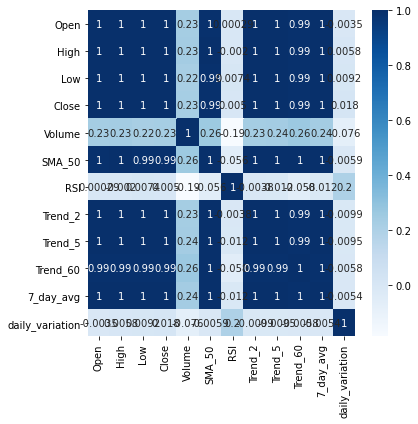

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6,6))
sns.heatmap(data.corr(), annot = True, cmap = "Blues")

plt.show()

In [ ]:
predictions = backtest(data, model, new_predictors,100,10)

<AxesSubplot:xlabel='Date'>

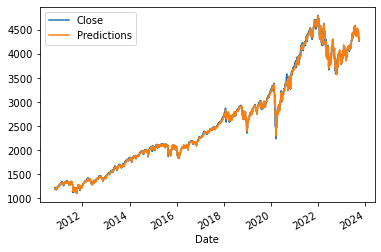

In [ ]:
predictions.plot()

In [ ]:
from sklearn import metrics
import numpy as np

print("Mean Absolute Error with Backtest:", round(metrics.mean_absolute_error(predictions["Close"],predictions["Predictions"]), 4))
print("Mean Squared Error with Backtest:", round(metrics.mean_squared_error(predictions["Close"],predictions["Predictions"]), 4))
print("Root Mean Squared Error with Backtest:", round(np.sqrt(metrics.mean_squared_error(predictions["Close"],predictions["Predictions"])), 4))
errors = abs(predictions["Close"]-predictions["Predictions"])
mape = 100 * (errors / predictions["Close"])
accuracy = 100 - np.mean(mape)
print('Accuracy with Backtest:', round(accuracy, 2), '%.') 

Mean Absolute Error with Backtest: 14.1497
Mean Squared Error with Backtest: 518.9594
Root Mean Squared Error with Backtest: 22.7807
Accuracy with Backtest: 99.46 %.


In [ ]:
# Get feature importances
feature_importances = model.feature_importances_
import seaborn as sns

# Create a DataFrame to store feature names and importances
feature_df = pd.DataFrame({'Feature': predictors, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Create the feature importance plot
plt.figure(figsize=(6, 3))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
predictions['residuals'] = predictions['Close'] - predictions['Predictions']

high_risk_threshold = 15
moderate_risk_threshold = 10
low_risk_threshold = 20

def categorize_risk(residual):
    if abs(residual) > high_risk_threshold:
        return 'Very Risky'
    elif abs(residual) > moderate_risk_threshold:
        return 'Risky'
    elif abs(residual) > low_risk_threshold:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

predictions['Risk Level'] = predictions['residuals'].apply(categorize_risk)

predictions

In [ ]:
predictions[predictions['Risk Level']=='Moderate Risk'].count()